In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Setting up the dataset</h1>

In [2]:
# Downloading MNIST data set from default data sets provided by PyTorch
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([ transforms.ToTensor()])
)

In [3]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

<h1>A quick look at our dataset</h1>

In [4]:
# Max printed line size
torch.set_printoptions(linewidth=120)

In [5]:
print("The length of the train set:", len(train_set))
print("The length of train sets labels:", len(train_set.targets))
print("Labels: ")
print(train_set.targets)
# Frequency analasys of the training set
# Shows occurences of each label
print("Bin count of the train set:", train_set.targets.bincount())

The length of the train set: 60000
The length of train sets labels: 60000
Labels: 
tensor([9, 0, 0,  ..., 3, 0, 5])
Bin count of the train set: tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


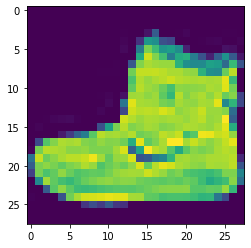

Label: 9


In [6]:
sample = next(iter(train_set))
image, label = sample
# Image is in gray scale but i like to display it with nice colors
plt.imshow(torch.squeeze(image))
plt.show()
print("Label:", label)

In [7]:
# A batch of size 10
batch = next(iter(train_loader))
images, labels = batch

In [8]:
images.shape

torch.Size([10, 1, 28, 28])

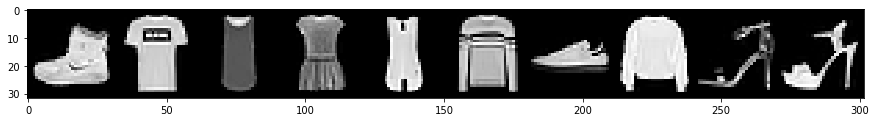

Labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [9]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()
print("Labels:", labels)

<h1>Building the model</h1>

In [14]:
# Two convolutional layers and 2 linear ones
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
         
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        # t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer 
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        # t = t.flatten()
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        
        return t